# Data Analysis of Student Performance
This Jupyter Notebook explores the kaggle dataset [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data). The dataset includes features such as hours studied, attendance, parental involvement, sleep hours etc. The purpose of this code is to investigate on the key features to achieve high exams scores. 


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/StudentPerformanceFactors.csv')

## Adjusting Dataset

In [11]:
# Identifying nan data and substituting with most commmon value
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0]) 
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0]) 
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0]) 
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Dataset Features
Identify non-numeric features and verify if they can be converted to numeric. This is done to later calculate the correlation matrix and analyse which features are most important for success in exams.

In [12]:
# Isolate non-numeric features
non_numeric = df.select_dtypes(exclude=["number"]).columns
for column in non_numeric:
    print(column)
    print(df[column].unique())

Parental_Involvement
['Low' 'Medium' 'High']
Access_to_Resources
['High' 'Medium' 'Low']
Extracurricular_Activities
['No' 'Yes']
Motivation_Level
['Low' 'Medium' 'High']
Internet_Access
['Yes' 'No']
Family_Income
['Low' 'Medium' 'High']
Teacher_Quality
['Medium' 'High' 'Low']
School_Type
['Public' 'Private']
Peer_Influence
['Positive' 'Negative' 'Neutral']
Learning_Disabilities
['No' 'Yes']
Parental_Education_Level
['High School' 'College' 'Postgraduate']
Distance_from_Home
['Near' 'Moderate' 'Far']
Gender
['Male' 'Female']


In [13]:
# Substitute non-numeric features with numeric substitutions
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(mapping)
df['Family_Income'] = df['Family_Income'].map(mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(mapping)

mapping = {'Negative': 1, 'Neutral': 2, 'Positive': 3}
df['Peer_Influence'] = df['Peer_Influence'].map(mapping)

mapping = {'Yes': 1, 'No': 0}
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(mapping)
df['Internet_Access'] = df['Internet_Access'].map(mapping)
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(mapping)

mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}
df['Distance_from_Home'] = df['Distance_from_Home'].map(mapping)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,Public,3,3,0,High School,1,Male,67
1,19,64,1,2,0,8,59,1,1,2,2,2,Public,1,4,0,College,2,Female,61
2,24,98,2,2,1,7,91,2,1,2,2,2,Public,2,4,0,Postgraduate,1,Male,74
3,29,89,1,2,1,8,98,2,1,1,2,2,Public,1,4,0,High School,2,Male,71
4,19,92,2,2,1,6,65,2,1,3,2,3,Public,2,4,0,College,1,Female,70


## Correlation Matrix
From the correlation matrix it is clear the most important features are `Attendance` and `Hours_Studied`.

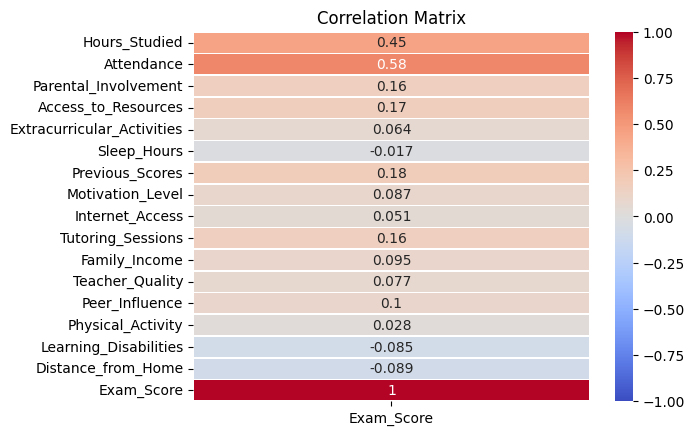

In [15]:
correlation_matrix = df.corr()[['Exam_Score']]
# plt.figure(figsize=(20, 20))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Exam Score Distribution per Gender

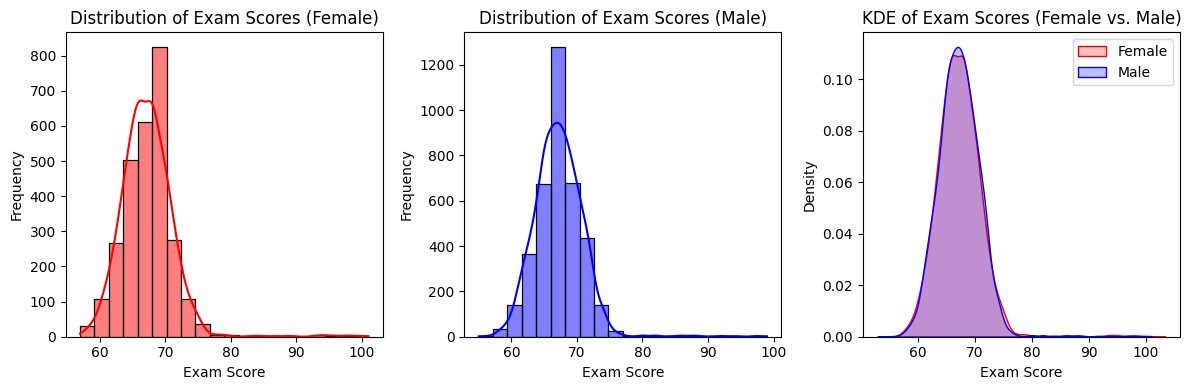

In [6]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First plot: Histogram for Female
sns.histplot(female_df['Exam_Score'], kde=True, color='red', bins=20, ax=axes[0])
axes[0].set_title('Distribution of Exam Scores (Female)')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')

# Second plot: Histogram for Male
sns.histplot(male_df['Exam_Score'], kde=True, color='blue', bins=20, ax=axes[1])
axes[1].set_title('Distribution of Exam Scores (Male)')
axes[1].set_xlabel('Exam Score')
axes[1].set_ylabel('Frequency')

# Third plot: Combined KDE for both Female and Male
sns.kdeplot(female_df['Exam_Score'], color='red', fill=True, ax=axes[2], label='Female')
sns.kdeplot(male_df['Exam_Score'], color='blue', fill=True, ax=axes[2], label='Male')
axes[2].set_title('KDE of Exam Scores (Female vs. Male)')
axes[2].set_xlabel('Exam Score')
axes[2].set_ylabel('Density')
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Visualize Effect of Hourse Studied and Attendance

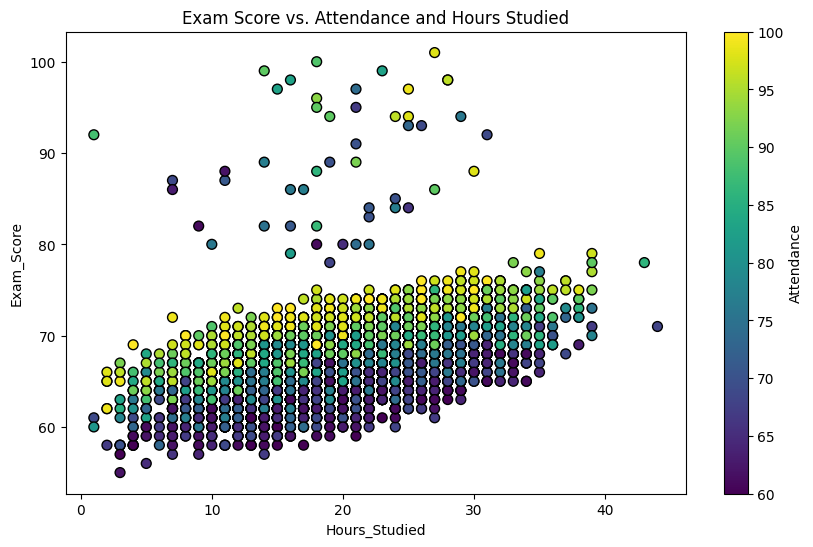

In [19]:
plt.figure(figsize=(10, 6))
x = 'Hours_Studied'
z = 'Attendance'
y = 'Exam_Score'
scatter = plt.scatter(df[x], df[y], c=df[z], cmap='viridis', s=50, edgecolors='k')

# Add color bar to show the scale of the third variable
plt.colorbar(scatter, label=z)

# Labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('Exam Score vs. Attendance and Hours Studied')

# Show the plot
plt.show()